A construction firm wants to develop a suburban locality with new infrastructure but they might incur losses if they cannot sell the properties. To overcome this, they consult an analytics firm to get insights on how densely the area is populated and the income levels of residents. Use the Support Vector Machines algorithm on the given dataset and draw out insights and also comment on the viability of investing in that area.



In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
# import dataset
df_train = pd.read_csv('C:\\Users\\vaibh\\Desktop\\360 Digitmg\\SVM\\Assignment\\SalaryData_Train (1).csv')
df_test = pd.read_csv('C:\\Users\\vaibh\\Desktop\\360 Digitmg\\SVM\\Assignment\\SalaryData_Test (1).csv')

In [3]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
df_train.shape, df_test.shape

((30161, 14), (15060, 14))

In [6]:
# Joining train and test data
data = df_train.append(df_test)
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
data.shape

(45221, 14)

In [8]:
# Checking for null values
data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

    There are no null values

In [9]:
# Checking for duplicated values
data.duplicated().sum()

5982

In [10]:
# Dropping duplicated rows
data.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [11]:
data.shape

(39239, 14)

In [12]:
# Descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39239.0,39.309412,13.298159,17.0,29.0,38.0,48.0,90.0
educationno,39239.0,10.136293,2.637228,1.0,9.0,10.0,13.0,16.0
capitalgain,39239.0,1253.346186,7994.096625,0.0,0.0,0.0,0.0,99999.0
capitalloss,39239.0,101.207727,431.309171,0.0,0.0,0.0,0.0,4356.0
hoursperweek,39239.0,41.206121,12.458178,1.0,40.0,40.0,45.0,99.0


In [13]:
# Info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39239 entries, 0 to 39238
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            39239 non-null  int64 
 1   workclass      39239 non-null  object
 2   education      39239 non-null  object
 3   educationno    39239 non-null  int64 
 4   maritalstatus  39239 non-null  object
 5   occupation     39239 non-null  object
 6   relationship   39239 non-null  object
 7   race           39239 non-null  object
 8   sex            39239 non-null  object
 9   capitalgain    39239 non-null  int64 
 10  capitalloss    39239 non-null  int64 
 11  hoursperweek   39239 non-null  int64 
 12  native         39239 non-null  object
 13  Salary         39239 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.2+ MB


In [14]:
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
# Categorical data
cat_data = []
num_data = []
for i in data.columns:
    if np.dtype(data[i]) == 'O':
        cat_data.append(i)
    else:
        num_data.append(i) 

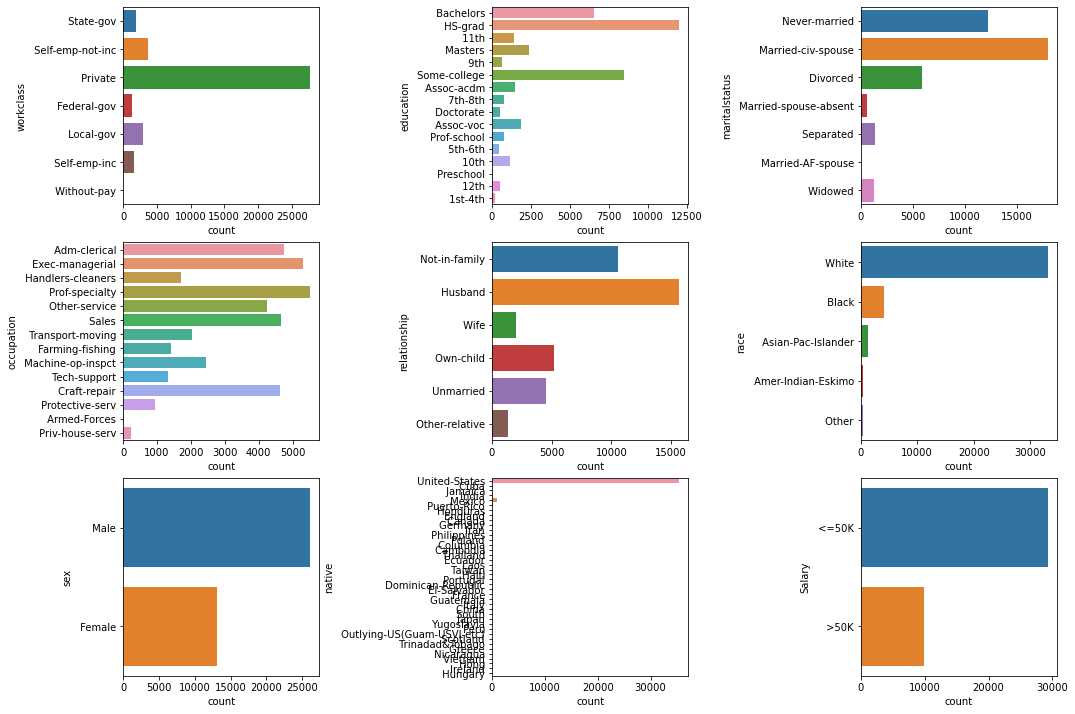

In [16]:
# Countplot 
fig,axes = plt.subplots(3,3,figsize=(15,10))
axes = axes.flatten()
index = 0
for col in cat_data:
    sns.countplot(y = data[col], ax=axes[index])
    index += 1
plt.tight_layout(w_pad = 0.5, h_pad = 0.5, pad= 1)

    1. Majority of people are from Private Working Class, having different occupations
    2. Large population belongs to US hence White people can be seen more
    3. Male count is more 
    4. Majority of people have salaries less than <= 50K

In [17]:
# Salaries based on sex
data.sex.groupby(data.Salary).value_counts()

Salary  sex    
 <=50K   Male      17746
         Female    11518
 >50K    Male       8351
         Female     1624
Name: sex, dtype: int64

In [18]:
# Salaries based on race
data.race.groupby(data.Salary).value_counts()

Salary  race               
 <=50K   White                 24083
         Black                  3561
         Asian-Pac-Islander      930
         Amer-Indian-Eskimo      382
         Other                   308
 >50K    White                  8980
         Black                   528
         Asian-Pac-Islander      369
         Amer-Indian-Eskimo       53
         Other                    45
Name: race, dtype: int64

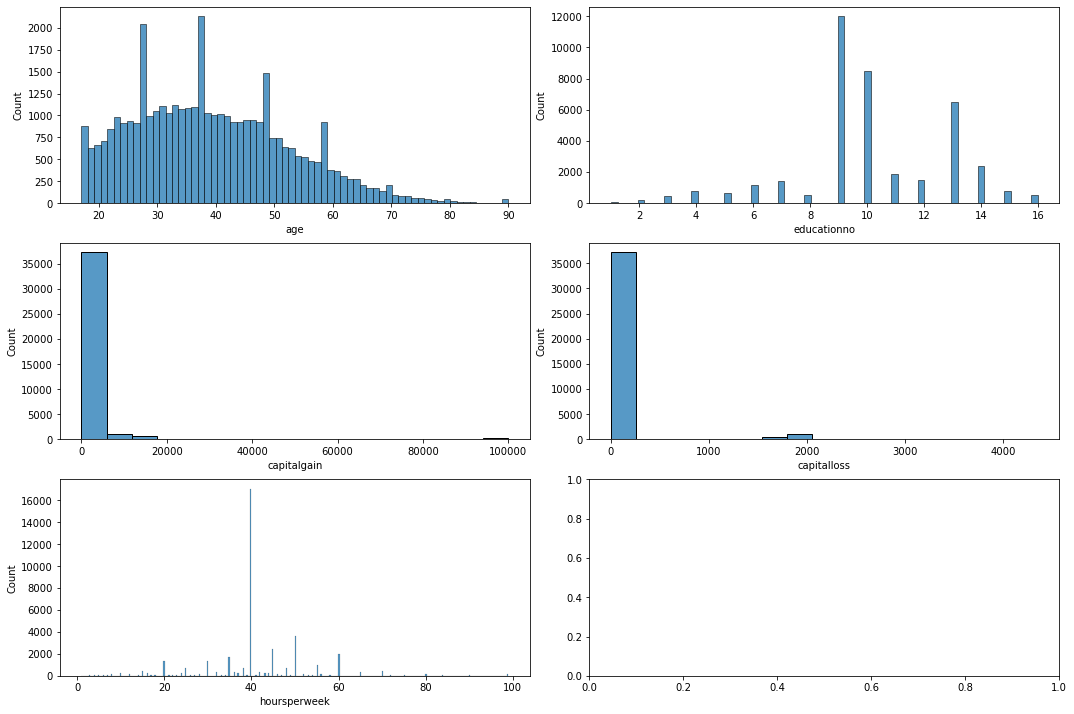

In [19]:
# Histogram for numerical data

figure,axes = plt.subplots(3,2,figsize=(15,10))
index = 0
axes = axes.flatten()

for i in num_data:
    sns.histplot(data = data[i], ax=axes[index])
    index +=1
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=1)

In [20]:
# Converting categorical to numerical
data = pd.get_dummies(columns = cat_data, drop_first=True, data=data)

In [21]:
data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary_ >50K
0,39,13,2174,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Splitting into x and y
x = data.drop('Salary_ >50K', axis=1)
y = data['Salary_ >50K']

In [23]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [24]:
# Normalizing
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms_x_train = mms.fit_transform(x_train)
mms_x_test = mms.fit_transform(x_test)

# SVM

In [25]:
# Using linear kernel
from sklearn.svm import SVC

model_linear = SVC(kernel = "linear")
model_linear.fit(mms_x_train, y_train)

SVC(kernel='linear')

In [26]:
pred_test_linear = model_linear.predict(mms_x_test)

In [27]:
np.mean(pred_test_linear == y_test)

0.8387699626231736

In [29]:
# Using rbf kernel

model_rbf = SVC(kernel = "rbf")
model_rbf.fit(mms_x_train, y_train)
pred_test_rbf = model_rbf.predict(mms_x_test)

np.mean(pred_test_rbf==y_test)

0.8338430173292558

Using kbf kernel gives slightly good result compared to linear kernel